In [5]:

import numpy as np
#import prettytable as pt
import pprint
import networkx as nx
#import qiskit
import pandas as pd 
import math 



import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import cluster, datasets
np.random.seed(0)
n_samples = 400
X, y = datasets.make_circles(n_samples=n_samples, factor=.4, noise=.1)

In [6]:
pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:

df = pd.read_csv(r'D:\downloads\ch130 - ch130.csv')
print(df)

    City_number           x           y
0             1  334.590925  161.780932
1             2  397.644663  262.816533
2             3  503.874183  172.874115
3             4  444.047940  384.649181
4             5  311.613715    2.009170
..          ...         ...         ...
126         127  196.684917  221.820916
127         128  384.927045   87.463017
128         129  178.110782  104.690581
129         130  403.287439  205.897175
130         EOF         NaN         NaN

[131 rows x 3 columns]


In [8]:
#df.drop(130, axis = 0, inplace=True)
df.head()

,City_number,x,y
0,1,334.590925,161.780932
1,2,397.644663,262.816533
2,3,503.874183,172.874115
3,4,444.047940,384.649181
4,5,311.613715,2.009170


Text(0, 0.5, '$y$')

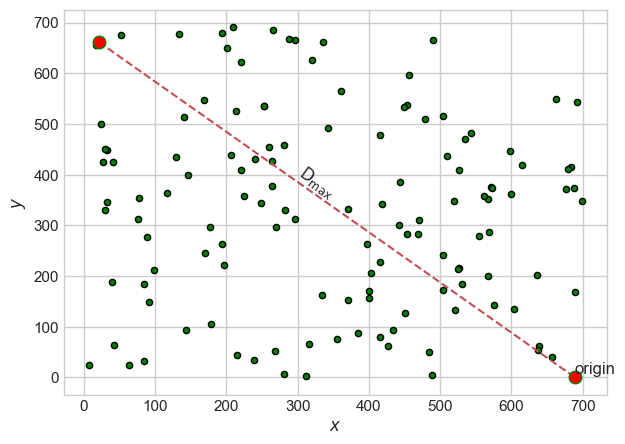

In [52]:
#sns.set_theme()
plt.figure(figsize = (7,5))
with plt.style.context(plt.style.available[26]):
    plt.scatter(df['x'][:130], df['y'][:130], s = 20, c = 'green', marker = 'o', edgecolors = 'black' ) # 65 and 122
plt.text(df['x'][65], df['y'][65]+6, 'origin')
#plt.text(df['x'][122], df['y'][122], 'origin')
x_values = [df['x'][65],df['x'][122]]
y_values = [df['y'][65],df['y'][122]]
#draw line 
with plt.style.context(plt.style.available[26]):

    plt.plot(x_values, y_values, 'ro',linestyle = '--')
    plt.plot(df['x'][122], df['y'][122], marker = 'o',markersize = 9, markeredgecolor = 'green', markerfacecolor = 'red')
    plt.plot(df['x'][65], df['y'][65], marker = 'o',markersize = 9, markeredgecolor = 'green', markerfacecolor = 'red')
angle = -36
l1 =  np.array((1,1))
l2 = np.array((300,400))
trans_angle = plt.gca().transData.transform_angles(np.array((45,)),l2.reshape((1,2)))[0]

# plot text 
th1 = plt.text(l2[0], l2[1], '$\mathrm{D_{max}}$', fontsize = 12, rotation = angle, rotation_mode = 'anchor')
#th1 = plt.text(l2[0], l2[1], '$\mathrm{D_{max} = 938.842 \; km}$', fontsize = 12, rotation = angle, rotation_mode = 'anchor')
#plt.title('Cities from churritz dataset')
plt.xlabel("$x$")
plt.ylabel("$y$")

In [10]:
((df['x'][0]-df['x'][1])**2 + (df['y'][0]-df['y'][1])**2)**(1/2)

119.09645958845321

In [11]:
def distance(x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)
distance(0,0,3,4)

5.0

In [12]:
dist_mat =  np.array(np.zeros((130, 130), dtype = float))
for i in range(len(dist_mat[0])):
    for j in range(len(dist_mat[0])):
        dist_mat[i][j] = ((df['x'][i]-df['x'][j])**2 + (df['y'][i]-df['y'][j])**2)**(1/2)
print(dist_mat)

[[  0.         119.09645959 169.64633856 ...  89.760111   166.56933501
   81.64223139]
 [119.09645959   0.         139.19177176 ... 175.81408799 270.55303013
   57.1983763 ]
 [169.64633856 139.19177176   0.         ... 146.43591541 332.82245698
  105.86886014]
 ...
 [ 89.760111   175.81408799 146.43591541 ...   0.         207.53254136
  119.84887938]
 [166.56933501 270.55303013 332.82245698 ... 207.53254136   0.
  246.87507293]
 [ 81.64223139  57.1983763  105.86886014 ... 119.84887938 246.87507293
    0.        ]]


In [13]:
from qiskit import IBMQ
IBMQ.save_account('3ccb2d17a0f19c3ce64cf44b3e1c90d3369ea562672f7315624ee8d92bb4350e10b643e3b2af92eef73c029e051518c2a833fb0ffa2e600b2c6c65ed5dd29d40')
IBMQ.load_account()
from qiskit import *
import math as m
import time
from copy import deepcopy
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer
from qiskit.quantum_info import state_fidelity
#simulators
S_simulator = Aer.backends(name = 'statevector_simulator')[0]
M_simulator = Aer.backends(name = 'qasm_simulator')[0]
U_simulator = Aer.backends(name = 'unitary_simulator')[0]
#provider = IBMQ.get_provider(hub = 'ibm-q-research')

C:\Users\sruhti patil\AppData\Local\Temp\ipykernel_1280\488098683.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('3ccb2d17a0f19c3ce64cf44b3e1c90d3369ea562672f7315624ee8d92bb4350e10b643e3b2af92eef73c029e051518c2a833fb0ffa2e600b2c6c65ed5dd29d40')
configrc.store_credentials:WARNING:2023-04-21 01:58:24,590: Credentials already present. Set overwrite=True to overwrite.


In [14]:
dist_symm = (dist_mat + dist_mat.T)/2
city_matrix= dist_symm


In [15]:
City_mat =  np.array(np.zeros((130, 130), dtype = int))
for i in range(len(city_matrix)):
    for j in range(len(city_matrix)):
        City_mat[i][j] = (city_matrix[i][j])

print(City_mat)

[[  0 119 169 ...  89 166  81]
 [119   0 139 ... 175 270  57]
 [169 139   0 ... 146 332 105]
 ...
 [ 89 175 146 ...   0 207 119]
 [166 270 332 ... 207   0 246]
 [ 81  57 105 ... 119 246   0]]


In [16]:
fin_distances = list((city_matrix.flatten()))
print(fin_distances[1])

119.09645958845321


In [17]:
#function to pick k largest elements in the matrix. 
#We will need to flatten the matrix to an array, 'arr' 
def kLargest(arr, k):
    # Sort the given array arr in reverse # order.
    kL=[]
    arr.sort(reverse = True)
    # Print the first kth largest elements
    for i in range(k):
        kL.append(arr[i]) 
    FD=list(set(kL))
    return FD


In [18]:
#FD is the largest element in the city_matrix, i.e., the largest distance between the cities. 

FD = kLargest(list(City_mat.flatten()),1)# .fltten, flattens the function to 1D
#We need the cities corresponding to this distance. They will serve as the centres of our 
#first two clusters
for i in range(len(City_mat[0])):  # O(n)
    for j in range(len(City_mat[0])): # O(n)

        for k in range(len(FD)): #O(n)
            if City_mat[i][j] == FD[k]:
                k2=i   ####
                k1=j  ####

print('cities with the largest distances are:', k1, 'and', k2)
print('The distance between cities', k1, 'and', k2, 'is', FD[0], 'km')


cities with the largest distances are: 65 and 122
The distance between cities 65 and 122 is 938 km


In [19]:
city_matrix[65][122]

938.5172441762741

In [20]:
#For now we choose any of the two cities as origin, and sort the cities according to their distances from the origin
# city_matirx[][] first one is row indices and second one is column index 
org  = k1 # chossing k1 as origin 
list_dist = []
list_cities=[]
for i in range(len(city_matrix[0])):
    list_dist.append(city_matrix[k1][i])
    list_cities.append(i)

city_dict = dict(zip(list_cities, list_dist))    
city_dict_sorted = dict(sorted(city_dict.items(), key=lambda item: item[1]))
print(city_dict_sorted)

{65: 0.0, 84: 50.33492678645284, 124: 73.9065769900453, 89: 79.75367140953634, 58: 158.7208379292688, 77: 167.12989390187076, 29: 180.84444946932712, 27: 199.59515889973056, 120: 207.37742496646572, 114: 209.84899875065227, 82: 213.3430921499953, 125: 233.7799393388975, 113: 242.03439185970657, 2: 252.57773969027855, 107: 268.46180820981596, 7: 269.1304795323804, 61: 269.17439414423666, 116: 269.40783775304084, 111: 270.336551036627, 104: 284.30440133052565, 17: 302.71465188200204, 20: 309.5596956059178, 32: 310.6899833852888, 127: 315.7543471383646, 38: 328.40527644635694, 70: 335.4156460668408, 15: 341.8457759858605, 12: 348.12425158807787, 129: 351.4603508060778, 40: 351.9509942284497, 49: 354.605263174337, 45: 356.775301711946, 79: 367.4649471567664, 95: 370.8258281769925, 22: 371.54263723025093, 21: 372.3931325508018, 66: 373.06624452834296, 4: 376.85075888135736, 44: 377.5558107339378, 19: 378.16119697938234, 36: 378.80231632018285, 92: 386.20432381046703, 117: 387.85611248053954

In [21]:
len(city_dict_sorted.values())

130

In [22]:
def decimalToBinary(n,N):  # bin returns the binary representation of an integer.  n is the input decimal and N is the length of the string 
    bin1=bin(n).replace("0b", "")
    bin2='0'*(N-len(bin1))+bin1
    return bin2

In [23]:
def binaryToDecimal(binary):
     
    binary1 = binary
    decimal, i, n = 0, 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    print(decimal)   

In [24]:
nq = int(math.log(FD[0]/10,2))+ 1  # representing the distances in terms of qubit 
int_list_dist=[int(i) for i in list_dist]
bin_dist = [decimalToBinary(int(i),nq) for i in list_dist] # all the distances from city k1 = 14 in binary form 
print(int_list_dist)
print(list_dist)


[388, 391, 252, 455, 376, 549, 674, 269, 840, 413, 407, 690, 348, 410, 621, 341, 501, 302, 586, 378, 309, 372, 371, 621, 741, 615, 558, 199, 651, 180, 522, 785, 310, 512, 435, 794, 378, 601, 328, 393, 351, 470, 590, 440, 377, 356, 390, 736, 585, 354, 494, 804, 550, 459, 455, 811, 840, 583, 158, 502, 475, 269, 660, 604, 779, 0, 373, 688, 625, 626, 335, 640, 726, 771, 777, 423, 750, 167, 613, 367, 708, 875, 213, 797, 50, 681, 689, 648, 673, 79, 694, 651, 386, 708, 624, 370, 631, 705, 748, 567, 928, 543, 754, 560, 284, 551, 573, 268, 450, 677, 938, 270, 774, 242, 209, 601, 269, 387, 831, 546, 207, 424, 938, 552, 73, 233, 539, 315, 520, 351]
[388.9028244625205, 391.6630138409448, 252.57773969027855, 455.3365470340419, 376.85075888135736, 549.3569891475764, 674.7274737598573, 269.1304795323804, 840.577034825004, 413.7719973231847, 407.7483170705917, 690.1897887783164, 348.12425158807787, 410.3701589128267, 621.6501495749832, 341.8457759858605, 501.01945707684973, 302.71465188200204, 586.344

In [25]:
print(2**nq)

128


In [26]:
nq = int(math.log(FD[0],2))+1 # number of qubits 
x1= np.zeros(2**nq,dtype = int) # x1 is an empty array 
for i in range(2**nq):    # i ranges from 0 to 2**N = 16384, 2^N also represents the range of distance
    if i in int_list_dist: # if the distance is in int_list_distance(which is the distance of each city from k1 city) then x1[i] = 1
        x1[i]=1
x1=x1/len(x1.nonzero()[0])


In [27]:
x2=x1.reshape(2**nq)
x2= x2/np.linalg.norm(x2)
x2

array([0.09166985, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ])

In [28]:
print(x1[0:300])

[0.00840336 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00840336 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00840336 0.         0.         0.         0.
 0.         0.00840336 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [29]:
num_clusters = 4
M = int(math.log(num_clusters,2)) # based on clusters 
M

2

In [30]:
num_clusters = 4
M = int(math.log(num_clusters,2))  # based on clusters 
M
c = ClassicalRegister(nq+M)
# we have N qubits and all are in state x2
# and we apply controlled not to rest of the M qubits(ancillas).
#quantum circuit
q=QuantumRegister(nq+M) # 18 qubits 
#c=ClassicalRegister(N+M)
qc = QuantumCircuit(q,c)
qc.initialize(x2, [i+M for i in range(nq)]) # prepare x2 state on the first 8 qubits  
# qc.initialize(params, qubits=None)
# qubits = quantumregister or a list. these are genreally qubits that are to be initialized
for j in range(M):
    qc.cx(nq+j,j)

job = execute(qc, backend=S_simulator, optimization_level=0)
psi_block2 = job.result().get_statevector(qc, decimals=16) # gives the final statevector of the experiment upto 16 decimal places

#qc.draw()

In [31]:
nq

10

In [32]:
qc.measure(range(nq+M),range(nq+M)) # this is a way to do all the qc.measure(qr8[j],cr8[j]) at once

qobj = assemble(qc, shots=8125)
Counts = S_simulator.run(qobj).result().get_counts()

In [33]:
Counts.keys()

dict_keys(['110000101111', '101000000010', '110010010011', '010010111001', '000011001000', '011100011101', '010000110001', '101010100110', '011000011101', '100010010110', '001110100100', '010001110001', '110010101111', '001001111000', '100011000010', '000100111100', '010111100001', '000100100100', '100010111010', '101110010110', '010111010101', '011011100001', '000000000000', '101110000010', '011110111001', '010000110101', '100011110110', '100100111010', '101101011010', '011000011001', '111010101011', '011111010101', '100111000110', '110110101111', '010111001001', '100101100110', '010011010101', '011001011101', '010110001001', '010101111101', '001101010100', '100000101010', '010011101101', '110011111111', '010111100101', '100011011110', '001111110000', '101011001010', '101110110010', '010111001101', '010111010001', '100110011110', '100010011010', '010101110001', '011001110101', '101011000010', '101011011010', '001100111100', '101010010110', '011000010001', '101000100010', '100100101010

In [34]:
list1=[] # list1 is the list that contains the position of elements in the statevector whose value is greater than 10^-16
list2=[]
for j in range(len(psi_block2)):        
    if abs(psi_block2[j])> 10**(-16): # abs: returns the absolute value of the argument  # why this step? # these are the cities ig
        list1.append(j)
        list2.append(abs(psi_block2[j]))
print(list1)

[0, 200, 292, 316, 632, 668, 720, 796, 828, 836, 852, 932, 968, 1008, 1073, 1077, 1081, 1137, 1209, 1237, 1241, 1261, 1313, 1341, 1365, 1393, 1405, 1417, 1425, 1469, 1481, 1485, 1489, 1493, 1505, 1509, 1513, 1545, 1549, 1553, 1561, 1565, 1573, 1629, 1641, 1653, 1693, 1697, 1741, 1761, 1801, 1821, 1837, 1881, 1901, 1977, 2005, 2009, 2050, 2082, 2090, 2158, 2174, 2186, 2198, 2202, 2206, 2210, 2234, 2242, 2270, 2294, 2334, 2342, 2346, 2362, 2406, 2418, 2454, 2462, 2486, 2498, 2502, 2506, 2526, 2562, 2594, 2606, 2642, 2694, 2698, 2710, 2726, 2754, 2758, 2762, 2778, 2822, 2834, 2906, 2946, 2966, 2994, 3002, 3018, 3087, 3099, 3111, 3119, 3143, 3179, 3191, 3219, 3247, 3327, 3363, 3503, 3715, 3755]


In [35]:
anc_key = list(set([list(Counts.keys())[i][nq:nq+M] for i in range(len(list(Counts.keys())))])) ## last 4 qubits are for the clusters which is bascically ancilla qubits 
List_cluster=[]
for i in range(len(anc_key)):
    cluster=[]
    for j in range(len(list(Counts.keys()))):
        if anc_key[i] == list(Counts.keys())[j][nq:nq+M]:
            cluster.append(list(Counts.keys())[j][0:nq])
    List_cluster.append(cluster)


In [36]:
anc_key

['01', '00', '10', '11']

In [37]:
decimal_cluster_1 = []
decimal_cluster_2 = []
decimal_cluster_3 = []
decimal_cluster_4 = []

for i in range(len(List_cluster[0])):
    decimal_cluster_1.append(int(List_cluster[0][i],2))

for i in range(len(List_cluster[1])):
    decimal_cluster_2.append(int(List_cluster[1][i],2))

for i in range(len(List_cluster[2])):
    decimal_cluster_3.append(int(List_cluster[2][i],2))

for i in range(len(List_cluster[3])):
    decimal_cluster_4.append(int(List_cluster[3][i],2))

decimal_cluster_1.sort()
decimal_cluster_2.sort()
decimal_cluster_3.sort()
decimal_cluster_4.sort()

print(decimal_cluster_1)
print(decimal_cluster_2)
print(decimal_cluster_3)
print(decimal_cluster_4)

[268, 269, 270, 284, 302, 309, 310, 315, 328, 335, 341, 348, 351, 354, 356, 367, 370, 371, 372, 373, 376, 377, 378, 386, 387, 388, 390, 391, 393, 407, 410, 413, 423, 424, 435, 440, 450, 455, 459, 470, 475, 494, 501, 502]
[0, 50, 73, 79, 158, 167, 180, 199, 207, 209, 213, 233, 242, 252]
[512, 520, 522, 539, 543, 546, 549, 550, 551, 552, 558, 560, 567, 573, 583, 585, 586, 590, 601, 604, 613, 615, 621, 624, 625, 626, 631, 640, 648, 651, 660, 673, 674, 677, 681, 688, 689, 690, 694, 705, 708, 726, 736, 741, 748, 750, 754]
[771, 774, 777, 779, 785, 794, 797, 804, 811, 831, 840, 875, 928, 938]


In [38]:
fin_cluster_1 =[]
fin_cluster_2 =[]
fin_cluster_3 =[]
fin_cluster_4 =[]

for j in range(len(city_dict_sorted)):
    for i in decimal_cluster_1:
        if i < city_dict_sorted[j] < i+1:
            fin_cluster_1.append(city_dict_sorted[j])

for j in range(len(city_dict_sorted)):
    for i in decimal_cluster_2:
        if i < city_dict_sorted[j] < i+1:
            fin_cluster_2.append(city_dict_sorted[j])

for j in range(len(city_dict_sorted)):
    for i in decimal_cluster_3:
        if i < city_dict_sorted[j] < i+1:
            fin_cluster_3.append(city_dict_sorted[j])

for j in range(len(city_dict_sorted)):
    for i in decimal_cluster_4:
        if i < city_dict_sorted[j] < i+1:
            fin_cluster_4.append(city_dict_sorted[j])

fin_cluster_1.sort()
fin_cluster_2.sort()
fin_cluster_3.sort()
fin_cluster_4.sort()

#print((set(fin_cluster_1)))
print((set(fin_cluster_2)))
#print((set(fin_cluster_3)))
#print((set(fin_cluster_4)))

{167.12989390187076, 199.59515889973056, 73.9065769900453, 233.7799393388975, 79.75367140953634, 207.37742496646572, 209.84899875065227, 50.33492678645284, 242.03439185970657, 180.84444946932712, 213.3430921499953, 252.57773969027855, 158.7208379292688}


In [39]:
edges_1 = list()
edges_with_weights_1 = list()
for i in (fin_cluster_2):
    #for j in range(len(matrix[0])):
    for k in range(len(city_matrix[0])):

        if  i == city_matrix[k1][k] :
            edges_with_weights_1.append((k1,k,city_matrix[k1][k] ))
            edges_1.append([j,k])
print(edges_with_weights_1)

[(65, 84, 50.33492678645284), (65, 124, 73.9065769900453), (65, 89, 79.75367140953634), (65, 58, 158.7208379292688), (65, 77, 167.12989390187076), (65, 29, 180.84444946932712), (65, 27, 199.59515889973056), (65, 120, 207.37742496646572), (65, 114, 209.84899875065227), (65, 82, 213.3430921499953), (65, 125, 233.7799393388975), (65, 113, 242.03439185970657), (65, 2, 252.57773969027855)]


{(65,
  84): Text(-0.9206267297267914, -0.27032048901053685, '50.33492678645284'),
 (65, 124): Text(-0.707707554101944, -0.4548160274836661, '73.9065769900453'),
 (65,
  89): Text(-0.4288424775004387, -0.49491076072188633, '79.75367140953634'),
 (65,
  58): Text(-0.1725696325302124, -0.37787483533355015, '158.7208379292688'),
 (65,
  77): Text(-0.020253479480743408, -0.14086618920298832, '167.12989390187076'),
 (65,
  29): Text(-0.020253539085388184, 0.14086626569298488, '180.84444946932712'),
 (65,
  27): Text(-0.17256960272789001, 0.3778747181084512, '199.59515889973056'),
 (65,
  120): Text(-0.4288424178957939, 0.4949106434967874, '207.37742496646572'),
 (65,
  114): Text(-0.7077076882123947, 0.45481588045624477, '209.84899875065227'),
 (65, 82): Text(-0.9206268191337585, 0.2703202823784707, '213.3430921499953')}

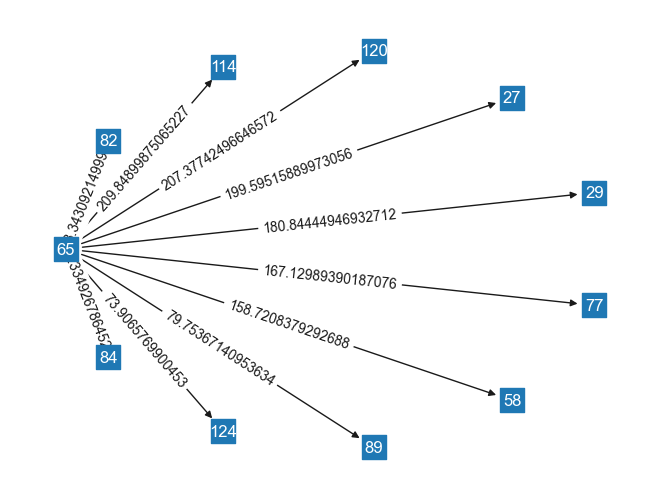

In [40]:
DG = nx.DiGraph()
DG.add_weighted_edges_from(edges_with_weights_1[:10])
weight_labels = nx.get_edge_attributes(DG,'weight')
pos = nx.shell_layout(DG)
nx.draw(DG,pos, font_color = 'white', node_shape = 's', with_labels = True,)
nx.draw_networkx_edge_labels(DG,pos,edge_labels=weight_labels)

In [41]:
cl = []
cl1 = []
for j in range(len(fin_cluster_2)):
    for i in range(130):
        if ((df['x'][65]-df['x'][i])**2 + (df['y'][65]-df['y'][i])**2)**(1/2) == fin_cluster_2[j]  :
            cl.append(df['x'][i])
            cl1.append(df['y'][i])

In [42]:
cl_1 = []
cl1_1 = []
for j in range(len(fin_cluster_1)):
    for i in range(130):
        if ((df['x'][65]-df['x'][i])**2 + (df['y'][65]-df['y'][i])**2)**(1/2) == fin_cluster_1[j]  :
            cl_1.append(df['x'][i])
            cl1_1.append(df['y'][i])

In [43]:
cl_2 = []
cl1_2 = []
for j in range(len(fin_cluster_3)):
    for i in range(130):
        if ((df['x'][65]-df['x'][i])**2 + (df['y'][65]-df['y'][i])**2)**(1/2) == fin_cluster_3[j]  :
            cl_2.append(df['x'][i])
            cl1_2.append(df['y'][i])

In [44]:
cl_3 = []
cl1_3 = []
for j in range(len(fin_cluster_4)):
    for i in range(130):
        if ((df['x'][65]-df['x'][i])**2 + (df['y'][65]-df['y'][i])**2)**(1/2) == fin_cluster_4[j]  :
            cl_3.append(df['x'][i])
            cl1_3.append(df['y'][i])

In [45]:
print(cl)
print(cl1)

[657.0199585, 637.7191022, 638.4885716, 603.2853486, 689.8079027, 575.8409416, 488.8909044, 635.538939, 484.3595849, 521.1658691, 566.564561, 530.4849979, 503.8741827]
[39.77729083, 54.20484124, 62.62625585, 134.4006474, 167.5947004, 141.967096, 3.612231139, 200.9811207, 49.24603873, 132.8617087, 199.9551616, 183.8390534, 172.8741151]


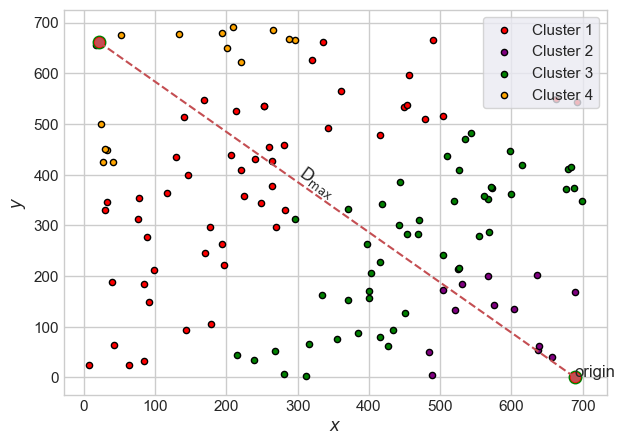

In [53]:
#sns.set_theme()
plt.figure(figsize = (7,5))
with plt.style.context(plt.style.available[26]):
    plt.scatter(cl_2,cl1_2, s = 20, c = 'red', marker = 'o', edgecolors = 'black')
    plt.scatter(cl,cl1, s = 20, c = 'purple', marker = 'o', edgecolors = 'black' )
    plt.scatter(cl_1,cl1_1, s = 20, c = 'green', marker = 'o', edgecolors = 'black')

    plt.scatter(cl_3,cl1_3, s = 20, c = 'orange', marker = 'o', edgecolors = 'black')
#plt.title('Clustered Cities from Churritz dataset')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(['Cluster 1','Cluster 2','Cluster 3','Cluster 4'] )
#.scatter(df['x'][:130], df['y'][:130]+6, s =4 ) # 65 and 122
plt.text(df['x'][65], df['y'][65], 'origin')
#plt.text(df['x'][122], df['y'][122], 'origin')
plt.plot(df['x'][122], df['y'][122], marker = 'o',markersize = 9, markeredgecolor = 'green', markerfacecolor = 'red')
plt.plot(df['x'][65], df['y'][65], marker = 'o',markersize = 9, markeredgecolor = 'green', markerfacecolor = 'red')
plt.plot(x_values, y_values, 'ro',linestyle = '--')

angle = -36
l1 =  np.array((1,1))
l2 = np.array((300,400))
trans_angle = plt.gca().transData.transform_angles(np.array((45,)),l2.reshape((1,2)))[0]

# plot text 
th1 = plt.text(l2[0], l2[1], '$\mathrm{D_{max}}$', fontsize = 12, rotation = angle, rotation_mode = 'anchor')
#th1 = plt.text(l2[0], l2[1], '$\mathrm{D_{max} = 938.842 \; km}$', fontsize = 12, rotation = angle, rotation_mode = 'anchor')


In [47]:
import seaborn as sns


Text(0, 0.5, '$y$')

Error in callback <function _draw_all_if_interactive at 0x000002798C5C51F0> (for post_execute):


KeyboardInterrupt: 

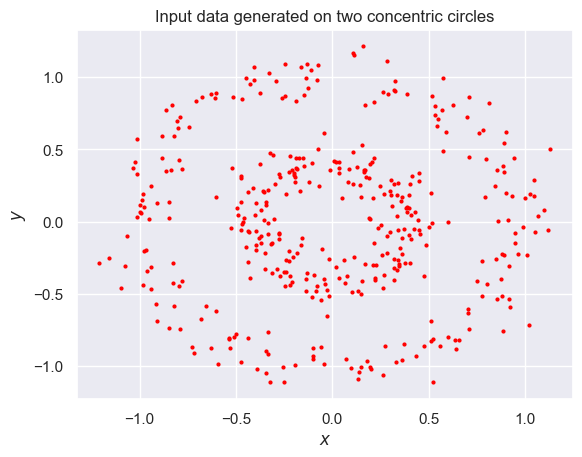

In [48]:
#sns.despine()
#sns.set_style('white')
sns.set_theme()
plt.title("Input data generated on two concentric circles")
for i in range(len(X[:,0])):
    plt.scatter(X[:,0][i],X[:,1][i], s = 4, c = 'red')
plt.xlabel("$x$")
plt.ylabel("$y$")



In [ ]:
dist_from_origin = []
def distance_from_origin(x1,y1):
    return (x1**2 + y1**2)**(1/2)
for i in range(len(X[:,0])):
    dist_from_origin.append(distance_from_origin(X[:,0][i],X[:,1][i])) 
for i in range(400):
    dist_from_origin[i] = dist_from_origin[i]*10
print(max(dist_from_origin))

12.483369566118885


In [ ]:
def decimalToBinary(n,N):  # bin returns the binary representation of an integer.  n is the input decimal and N is the length of the string 
    bin1=bin(n).replace("0b", "")
    bin2='0'*(N-len(bin1))+bin1
    return bin2

In [ ]:
def binaryToDecimal(binary):
     
    binary1 = binary
    decimal, i, n = 0, 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    print(decimal) 

In [ ]:

nq = int(math.log(max(dist_from_origin),2))+ 1  # representing the distances in terms of qubit 
int_list_dist=[int(i) for i in dist_from_origin]
bin_dist = [decimalToBinary(i,nq) for i in int_list_dist] # all the distances from city k1 = 14 in binary form 
print(type(len(int_list_dist)))
print(len(bin_dist))  # left one is the most significant bit 

<class 'int'>
400


In [ ]:
nq = int(math.log(max(dist_from_origin),2))+1 # number of qubits 
x1= np.zeros(2**nq,dtype = int) # x1 is an empty array 
for i in range(2**nq):    # i ranges from 0 to 2**N = 16384, 2^N also represents the range of distance
    if i in int_list_dist: # if the distance is in int_list_distance(which is the distance of each city from k1 city) then x1[i] = 1
        x1[i]=1
x1=x1/len(x1.nonzero()[0])

In [ ]:
int('0011',2)

3

In [ ]:
x2=x1.reshape(2**nq)
x2= x2/np.linalg.norm(x2)

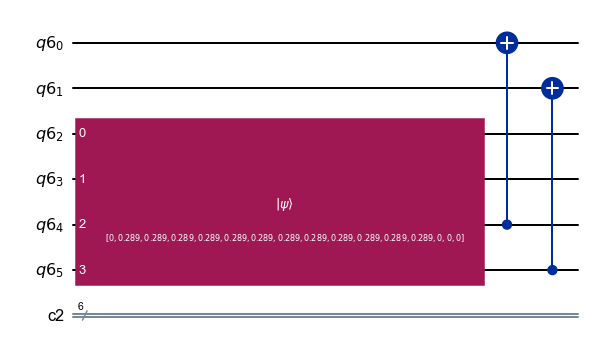

In [ ]:
num_clusters = 3
M = int(math.log(num_clusters,2)) +1 # based on clusters 
M
c = ClassicalRegister(nq+M)
# we have N qubits and all are in state x2
# and we apply controlled not to rest of the M qubits(ancillas).
#quantum circuit
q=QuantumRegister(nq+M) # 18 qubits 
#c=ClassicalRegister(N+M)
qc = QuantumCircuit(q,c)
qc.initialize(x2, [i+M for i in range(nq)]) # prepare x2 state on the first 8 qubits  
# qc.initialize(params, qubits=None)
# qubits = quantumregister or a list. these are genreally qubits that are to be initialized
for j in range(M):
    qc.cx(nq+j,j)

job = execute(qc, backend=S_simulator, optimization_level=0)
psi_block2 = job.result().get_statevector(qc, decimals=16) # gives the final statevector of the experiment upto 16 decimal places

qc.draw('mpl', style = 'iqx')

In [ ]:
qc.measure(range(nq+M),range(nq+M)) # this is a way to do all the qc.measure(qr8[j],cr8[j]) at once

qobj = assemble(qc, shots=8125)
Counts = S_simulator.run(qobj).result().get_counts()

In [ ]:
anc_key

['11', '01', '10', '00']

In [ ]:
list1=[] # list1 is the list that contains the position of elements in the statevector whose value is greater than 10^-16
list2=[]
for j in range(len(psi_block2)):        
    if abs(psi_block2[j])> 10**(-16): # abs: returns the absolute value of the argument  # why this step? # these are the cities ig
        list1.append(j)
        list2.append(abs(psi_block2[j]))
print(list1)

[4, 8, 12, 17, 21, 25, 29, 34, 38, 42, 46, 51]


In [ ]:
anc_key = list(set([list(Counts.keys())[i][nq:nq+M] for i in range(len(list(Counts.keys())))])) ## last 4 qubits are for the clusters which is bascically ancilla qubits 
List_cluster=[]
for i in range(len(anc_key)):
    cluster=[]
    for j in range(len(list(Counts.keys()))):
        if anc_key[i] == list(Counts.keys())[j][nq:nq+M]:
            cluster.append(list(Counts.keys())[j][0:nq])
    List_cluster.append(cluster)


In [ ]:
decimal_cluster_1 = []
decimal_cluster_2 = []
decimal_cluster_3 = []
decimal_cluster_4 = []

for i in range(len(List_cluster[0])):
    decimal_cluster_1.append(int(List_cluster[0][i],2))

for i in range(len(List_cluster[1])):
    decimal_cluster_2.append(int(List_cluster[1][i],2))

for i in range(len(List_cluster[2])):
    decimal_cluster_3.append(int(List_cluster[2][i],2))

for i in range(len(List_cluster[3])):
    decimal_cluster_4.append(int(List_cluster[3][i],2))

decimal_cluster_1.sort()
decimal_cluster_2.sort()
decimal_cluster_3.sort()
decimal_cluster_4.sort()

print(decimal_cluster_1)
print(decimal_cluster_2)
print(decimal_cluster_3)
print(decimal_cluster_4)

[12]
[4, 5, 6, 7]
[8, 9, 10, 11]
[1, 2, 3]


In [ ]:
fin_cluster_1 =[]
fin_cluster_2 =[]
fin_cluster_3 =[]
fin_cluster_4 =[]

for j in range(len(dist_from_origin)):
    for i in decimal_cluster_1:
        if i-1 < dist_from_origin[j] < i+1:
            fin_cluster_1.append(dist_from_origin[j])

for j in range(len(dist_from_origin)):
    for i in decimal_cluster_2:
        if i-1 < dist_from_origin[j] < i+1:
            fin_cluster_2.append(dist_from_origin[j])

for j in range(len(dist_from_origin)):
    for i in decimal_cluster_3:
        if i-1 < dist_from_origin[j] < i+1:
            fin_cluster_3.append(dist_from_origin[j])

for j in range(len(dist_from_origin)):
    for i in decimal_cluster_4:
        if i-1 < dist_from_origin[j] < i+1:
            fin_cluster_4.append(dist_from_origin[j])

fin_cluster_1.sort()
fin_cluster_2.sort()
fin_cluster_3.sort()
fin_cluster_4.sort()

print(len(set(fin_cluster_1)))
print(len(set(fin_cluster_2)))
print(len(set(fin_cluster_3)))
print(len(set(fin_cluster_4)))

33
179
195
86


In [ ]:
clust_1 = list(set(fin_cluster_1 + fin_cluster_3) )
clust_2 = list(set(fin_cluster_2 + fin_cluster_4) )

In [ ]:
cl = []
for j in range(len(clust_1)):
    for i in range(400):
        if 10*((X[:,0][i])**2 + (X[:,1][i])**2)**(1/2) == clust_1[j]  :
            cl.append([X[:,0][i],X[:,1][i]])
#print(cl)
cl_2 = []
for j in range(len(clust_2)):
    for i in range(400):
        if 10*((X[:,0][i])**2 + (X[:,1][i])**2)**(1/2) == clust_2[j]  :
            cl_2.append([X[:,0][i],X[:,1][i]])


Text(0, 0.5, '$y$')

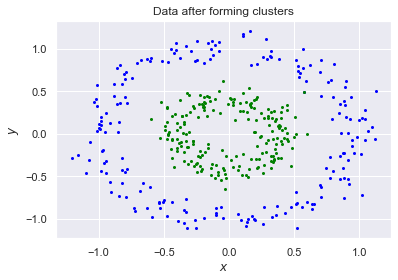

In [ ]:
sns.set_theme()
plt.title('Data after forming clusters')
for i in range(len(clust_1)):
    plt.scatter(cl[i][0], cl[i][1], s = 4, c = 'blue')
for i in range(len(clust_2)):
    plt.scatter(cl_2[i][0], cl_2[i][1], s = 4, c = 'green')
plt.xlabel("$x$")
plt.ylabel("$y$")

In [ ]:
cl[9][1]

0.864032742640138